<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/QC_Qiskit_Runtime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-visualization
!pip install qiskit-ibm-provider
!pip install qiskit-ibm-runtime
!pip install qiskit-experiments
!pip install imgaug==0.2.5
!pip install pylatexenc

In [2]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf


#
# Loading IBM credentials
#
API_TOKEN_DIR="/content/drive/'My Drive'/'Colab Notebooks'/QC"
API_TOKEN_FILE="MY_API_TOKEN.txt"

#Mount the google drive first
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/'My Drive'/'Colab Notebooks'/QC
%cd $API_TOKEN_DIR

#Read the MY_API_TOKEN from file...
from qiskit_ibm_provider import IBMProvider
MY_API_TOKEN = ""
with open(API_TOKEN_FILE) as f:
  MY_API_TOKEN=f.readline()
IBMProvider.save_account(MY_API_TOKEN, overwrite=True)

[default]
circuit_drawer = mpl
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/QC


References:
* https://www.youtube.com/watch?v=pTbSofHqimQ


## Defining the circuit

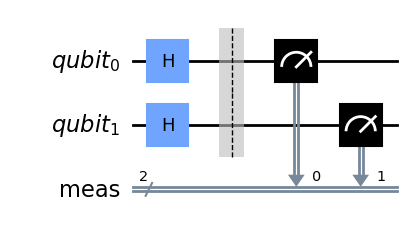

In [3]:
from qiskit import QuantumCircuit, QuantumRegister

qr = QuantumRegister(2, 'qubit')
qc = QuantumCircuit(qr)
qc.h(qr)
qc.measure_all()
qc.draw()

## Running on the backend

### Getting a service

In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session

service = QiskitRuntimeService()


### Running on a qasm simulator (in the backend)

SamplerResult(quasi_dists=[{1: 0.2555, 3: 0.2475, 2: 0.24375, 0: 0.25325}], metadata=[{'shots': 4000}])


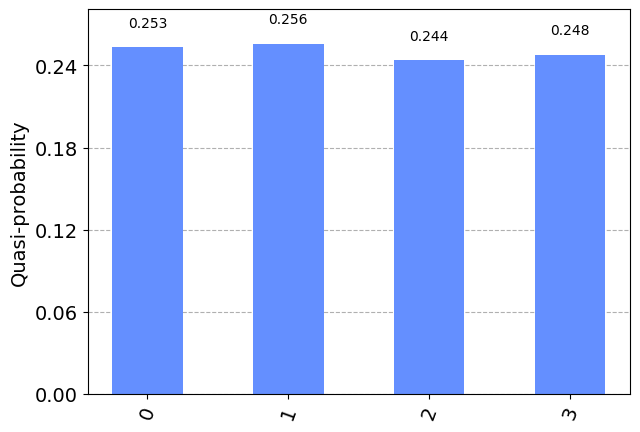

In [16]:
from qiskit.visualization import plot_distribution

backend = service.get_backend('ibmq_qasm_simulator')

with Session(service=service, backend=backend) as session:
  sampler = Sampler()
  job = sampler.run(circuits=qc)
  print(job.result()) #shows quasi probabilities
  display(plot_distribution(job.result().quasi_dists[0]))


In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table